## import some required libraries

In [3]:
#importing all the necessaries libraries for data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Define the dataset

In [4]:
#setting dataset path and converting into numpy file
data=pd.read_csv('/content/Grocery_data.csv')
print(data)

                                         Product Name           Category  \
0   Coriander Leaves With Roots - Enhances Flavour...  fruits-vegetables   
1                                       Onion (Loose)  fruits-vegetables   
2                                 Potato - Fresh Crop  fruits-vegetables   
3                             Carrot - Orange (Loose)  fruits-vegetables   
4                                              Potato  fruits-vegetables   
..                                                ...                ...   
94                                 Grapes - Red Globe  fruits-vegetables   
95                                          Blueberry  fruits-vegetables   
96                                   Banana - Yelakki  fruits-vegetables   
97                                  Baby Apple Shimla  fruits-vegetables   
98                            Apple - Shimla, Regular  fruits-vegetables   

    Quantity (gram)  Original Price (Rs.) Discount  Discounted Price (Rs.)  
0         

In [5]:
data.head()

,Product Name,Category,Quantity (gram),Original Price (Rs.),Discount,Discounted Price (Rs.)
0,Coriander Leaves With Roots - Enhances Flavour...,fruits-vegetables,100,10.918,6% OFF,10.3
1,Onion (Loose),fruits-vegetables,2000,64.070,49% OFF,43.0
2,Potato - Fresh Crop,fruits-vegetables,1000,48.260,27% OFF,38.0
3,Carrot - Orange (Loose),fruits-vegetables,1000,65.120,48% OFF,44.0
4,Potato,fruits-vegetables,1000,47.260,39% OFF,34.0


NORMAL VISUALIZATION OF DATA

In [6]:
# converting attributes into list
x1 =data['Quantity (gram)'].tolist()
x2 =data['Original Price (Rs.)'].tolist()
y  =data['Discounted Price (Rs.)'].tolist()
n=np.size(x1)

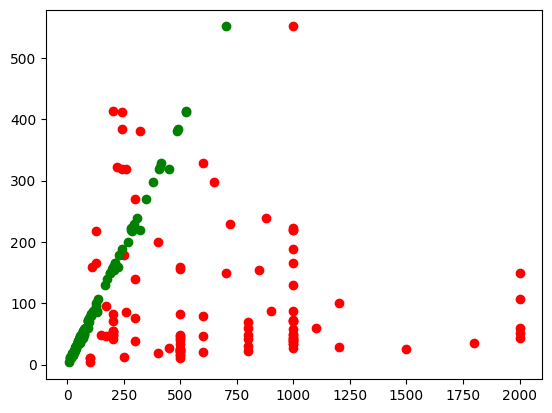

In [7]:
# ploting scatterplot to visualize the data
plt.scatter(x1, y, color = 'red')
plt.scatter(x2, y,color = 'green')
plt.show()

In [33]:
#calculating the normalized value for x1
x1_mean = np.mean(x1)
x1_std = np.std(x1)
x1_normalized = (x1 - x1_mean) / x1_std

In [34]:
x2_mean = np.mean(x2)
x2_std = np.std(x2)
x2_normalized = (x2 - x2_mean) / x2_std

## CALCULATING AND UPATING THE INTERCEPT AND SLOPE

In [35]:
# Initialize parameters
a0 = 0          # Intercept
a1 = 1          # Slope one
a2 = 1          # Slope two
lr = 0.0001     # Learning rate
iterations = 1000   # Number of iterations
error = []      # Error array to calculate cost for each iteration

for itr in range(iterations):
    error_cost = 0
    # Initialize gradients
    grad_a0 = 0
    grad_a1 = 0
    grad_a2 = 0

    for i in range(len(x1_normalized )):  # Assuming len(x1) == len(x2) == len(y)
        # Linear equation predicted value
        y_pred = a0 + a1 * x1_normalized[i] + a2 * x2_normalized[i]
        # Cost function calculation
        error_cost += (y[i] -y_pred) ** 2

        # Gradient descent calculation
        grad_a0 += -2 * (y[i] - y_pred)  # Partial derivative w.r.t a0
        grad_a1 += -2 * x1_normalized[i] * (y[i] - y_pred)  # Partial derivative w.r.t a1
        grad_a2 += -2 * x2_normalized[i] * (y[i] - y_pred)  # Partial derivative w.r.t a2

    # Update parameters
    a0 -= lr * grad_a0
    a1 -= lr * grad_a1
    a2 -= lr * grad_a2

    # Calculate and append the error for this iteration
    error.append(error_cost)

    # Print iteration and updated parameters (optional)
    print(itr, a0, a1, a2)

# After the loop, you can visualize the error trend or use the parameters for prediction.


0 2.1228320000000007 0.7038164170321533 3.163803446470361
1 4.203631926400001 0.4187091852469096 5.284050172385566
2 6.243232014257281 0.14435407856530058 7.361629280229678
3 8.242448020374987 -0.11956456784937858 9.397411487299781
4 10.202079549571561 -0.37335407138825005 11.392249510354
5 12.122910374490043 -0.6173136106338659 13.34697844212852
6 14.00570874907514 -0.8517344289592962 15.262416119897033
7 15.851227715843452 -1.0769000332082141 17.139363486242296
8 17.660205407069753 -1.2930863875721295 18.978604942205852
9 19.43336534000977 -1.5005621027782283 20.78090869297841
10 21.17141670627758 -1.6995886206986353 22.54702708628986
11 22.875054655493283 -1.8904203944893365 24.277696943654476
12 24.544960573314516 -2.073305064364489 25.973639884623605
13 26.18180235396289 -2.248483629109376 27.635562644194742
14 27.786234667354424 -2.416190613432869 29.26415738352279
15 29.358899220940806 -2.5766542312579026 30.86010199407614
16 30.900425016366178 -2.7300965450461896 32.42406039537

PRINTING UPDATED VALUES OF INTERCEPT AND SLOP

In [36]:
#printing out comes to intercept and slope value
print(a0 , a1 , a2)


107.2137371524541 -0.6894214968797789 110.0774819821179


Predicting the values

In [38]:
pred = a0 + a1 * x1_normalized + a2 * x2_normalized
print(pred)

[  6.81160185  45.54945297  34.66805203  47.84441911  33.8865356
  57.6199743    8.20426414  18.1962471   40.53724045  20.51735091
  10.03721553  56.20920644  43.68540559  41.34220238   7.69394697
  21.010757    51.1965339   79.0763773   50.25148973  68.41393165
 218.28533818  28.19499449  27.90011972  22.6931188   54.39352683
  53.19690336 162.00833977  19.31772318  54.51856945  52.4709964
  23.49492852  43.34544594  13.72492236 135.94522672  41.3603942
  98.71007331  50.89023173  46.76533572  35.70011375  50.7354392
  38.82512875  51.72796507   2.98373436  53.18486853  24.15409451
  96.6912977   20.51735091  18.1962471   24.44791855  79.65575019
  46.29376609  70.21473632 270.18630457  25.52687125  39.26395938
 322.86202324  67.42140578 156.7434805  159.49418834  28.35934295
 172.22981987 220.23188913 348.48893171  31.43513549  99.67931783
  74.60400183 236.71067177 313.6663326   87.04528343 217.02709672
 128.0123749  376.09707478 143.36404984  79.51868946  69.03523721
  23.01038833 

In [ ]:
plt.scatter(x1,y,color = 'red')
plt.scatter(x2,y,color='green')
plt.plot(x1,pred,color = 'blue')
plt.plot(x2,pred,color = 'black')
plt.xlabel("ORIGINAL PRICE AND QUANTITY")
plt.ylabel("DISCOUNTED PRICE ")

Analyze the performance of the model by calculating the mean squared error

In [42]:
error1 = y - pred
se = np.sum(error1 ** 2)
mse = se/n
print("mean squared error is", mse)

mean squared error is 34.70965413818025
